# Imports

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Utils

In [100]:
def plot_mean_values(df, title, x_label='Deltas', y_label='Média'):
    mean_values = df.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(df.columns, mean_values, marker='o')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [101]:
def process_model_data(df, model_name, columns, column_name = "len_milp_relaxed"):
    model_data = df.query(f'modelo == "{model_name}"')[column_name]
    model_data = model_data.apply(eval)
    df_model = pd.DataFrame(model_data.tolist(), columns=columns)
    mean_values = np.mean(df_model, axis=0).to_list()
    std_values = np.std(df_model, axis=0).to_list()
    return df_model, mean_values, std_values

In [102]:
def format_mean_std(
    m1_mean: list,
    m2_mean: list,
    m3_mean: list,
    m1_std: list,
    m2_std: list,
    m3_std: list,
    columns: list,
    mean_format: str = "{:.2f}",
    std_format: str = "{:.4f}",
):
    df_mean = pd.DataFrame(
        [m1_mean, m2_mean, m3_mean], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )
    df_std = pd.DataFrame(
        [m1_std, m2_std, m3_std], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )

    df_formatted = (
        df_mean.apply(lambda row: row.map(mean_format.format))
        + " ± "
        + df_std.apply(lambda row: row.map(std_format.format))
    )
    df_formatted = df_formatted.T
    return df_formatted

In [103]:
# def plot_multiple_means(
#     dfs: list, 
#     titles: list,
#     colors: list,
#     x_label='Deltas', 
#     y_label='Média', 
#     plt_title='Comparação das Médias'
#     ):
    
#     plt.figure(figsize=(10, 6))
    
#     for df, title, color in zip(dfs, titles, colors):
#         mean_values = df.mean(axis=0)
#         plt.plot(df.columns, mean_values, marker='o', label=title, color=color)

#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(plt_title)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# def plot_multiple_means(
#     dfs: list, 
#     titles: list,
#     colors: list,
#     x_label='Deltas', 
#     y_label='Média', 
#     plt_title='Comparação das Médias'
# ):
#     plt.figure(figsize=(10, 6))
    
#     for df, title, color in zip(dfs, titles, colors):
#         mean_values = df.mean(axis=0)
#         std_values = df.std(axis=0)
#         x = df.columns.astype(float)  # Certifique-se que são valores numéricos

#         plt.plot(x, mean_values, marker='o', label=title, color=color)
#         plt.fill_between(
#             x, 
#             mean_values - std_values, 
#             mean_values + std_values, 
#             color=color, 
#             alpha=0.2
#         )

#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(plt_title)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

import matplotlib.pyplot as plt

def plot_multiple_means(
    dfs: list, 
    titles: list,
    colors: list,
    x_label='Deltas', 
    y_label='Média', 
    plt_title='Comparação das Médias',
    show_std: bool = False
):
    plt.figure(figsize=(10, 6))
    
    for df, title, color in zip(dfs, titles, colors):
        mean_values = df.mean(axis=0)
        x = df.columns.astype(float)  # ou use range(len(df.columns)) se necessário

        plt.plot(x, mean_values, marker='o', label=title, color=color)

        if show_std:
            std_values = df.std(axis=0)
            plt.fill_between(
                x, 
                mean_values - std_values, 
                mean_values + std_values, 
                color=color, 
                alpha=0.2
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plt_title)
    plt.grid(True)
    plt.legend()
    plt.show()


# Data

In [104]:
import os

path = os.path.join(
    # "results",
    "relaxed",
    "get_explanation_range",
    "layer 0 relaxed"
)


iris = pd.read_csv(os.path.join(path, "iris.csv"))
wine = pd.read_csv(os.path.join(path, "wine.csv"))
breast_cancer = pd.read_csv(os.path.join(path, "breast_cancer.csv"))
glass = pd.read_csv(os.path.join(path, "glass.csv"))
# digits = pd.read_csv(os.path.join(path, "digits.csv"))

data = pd.concat([
    iris,
    wine,
    breast_cancer,
    glass,
    # digits
    ], ignore_index=True)
data

,dataset,modelo,instance,relaxed_times,relaxed_len_eq,relaxed_len_range,relaxed_explanation
0,iris,model_1layers_20neurons.h5,0,"[0.06855130195617676, 0.15663814544677734, 0.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.4375, 'x_1': 0.3749999999999..."
1,iris,model_1layers_20neurons.h5,1,"[0.030883073806762695, 0.03371071815490723, 0....","[0, 0, 1, 1, 2, 2, 2, 3, 3, 3]","[4, 4, 3, 3, 2, 2, 2, 1, 1, 1]","[{'eq': {}, 'range': [docplex.mp.RangeConstrai..."
2,iris,model_1layers_20neurons.h5,2,"[0.047712087631225586, 0.039490461349487305, 0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.9375, 'x_1': 0.25, 'x_2': 1...."
3,iris,model_1layers_20neurons.h5,3,"[0.04350423812866211, 0.046666860580444336, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.40625, 'x_1': 0.437499999999..."
4,iris,model_1layers_20neurons.h5,4,"[0.04336833953857422, 0.04454517364501953, 0.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.65625, 'x_1': 0.374999999999..."
...,...,...,...,...,...,...,...
1195,glass,model_3layers_20neurons.h5,95,"[0.2207348346710205, 0.2013700008392334, 0.238...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2201591511936271, 'x_1': 0.3..."
1196,glass,model_3layers_20neurons.h5,96,"[0.2143549919128418, 0.2529287338256836, 0.255...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2851458885941582, 'x_1': 0.5..."
1197,glass,model_3layers_20neurons.h5,97,"[0.21094036102294922, 0.30480027198791504, 0.5...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.4770114942528778, 'x_1': 0.5..."
1198,glass,model_3layers_20neurons.h5,98,"[0.17178702354431152, 0.19685792922973633, 0.2...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2347480106100903, 'x_1': 0.4..."


In [105]:
deltas = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Iris

### Tamanho

In [106]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(
    df=iris,
    model_name='model_1layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(
    df=iris,
    model_name='model_2layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)

iris_m3, iris_m3_mean, iris_m3_std = process_model_data(
    df=iris,
    model_name='model_3layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)

format_mean_std(iris_m1_mean, iris_m2_mean, iris_m3_mean, iris_m1_std, iris_m2_std, iris_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,2.52 ± 1.9312,2.02 ± 1.7492,2.32 ± 1.8269
0.2,2.76 ± 1.6560,2.49 ± 1.4317,2.72 ± 1.4702
0.3,3.10 ± 1.2207,2.83 ± 1.0682,3.06 ± 1.0938
0.4,3.29 ± 0.9622,3.00 ± 0.8602,3.18 ± 0.9315
0.5,3.43 ± 0.8032,3.02 ± 0.8364,3.20 ± 0.9165
0.6,3.54 ± 0.6545,3.12 ± 0.7652,3.22 ± 0.9009
0.7,3.62 ± 0.5437,3.19 ± 0.7028,3.25 ± 0.8761
0.8,3.64 ± 0.5004,3.23 ± 0.6611,3.26 ± 0.8674
0.9,3.65 ± 0.4770,3.30 ± 0.5745,3.26 ± 0.8674
1.0,3.65 ± 0.4770,3.31 ± 0.5603,3.27 ± 0.8585


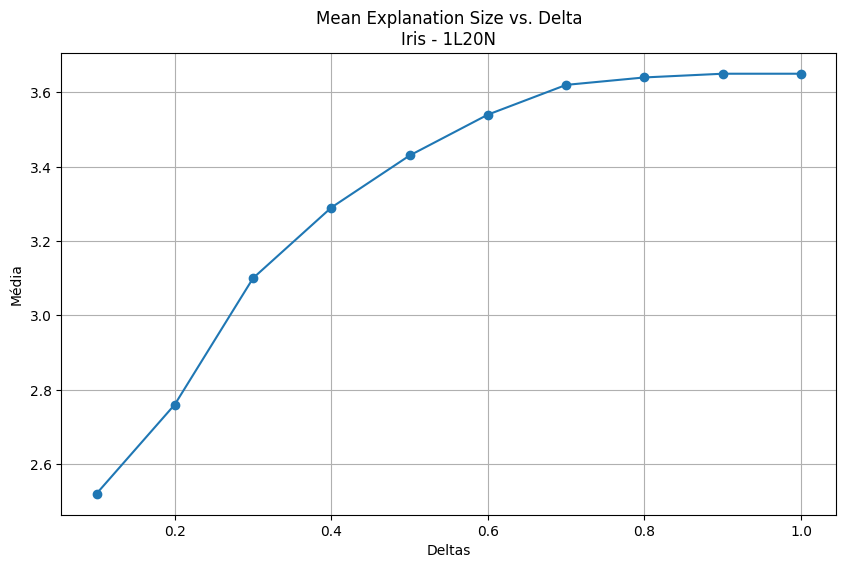

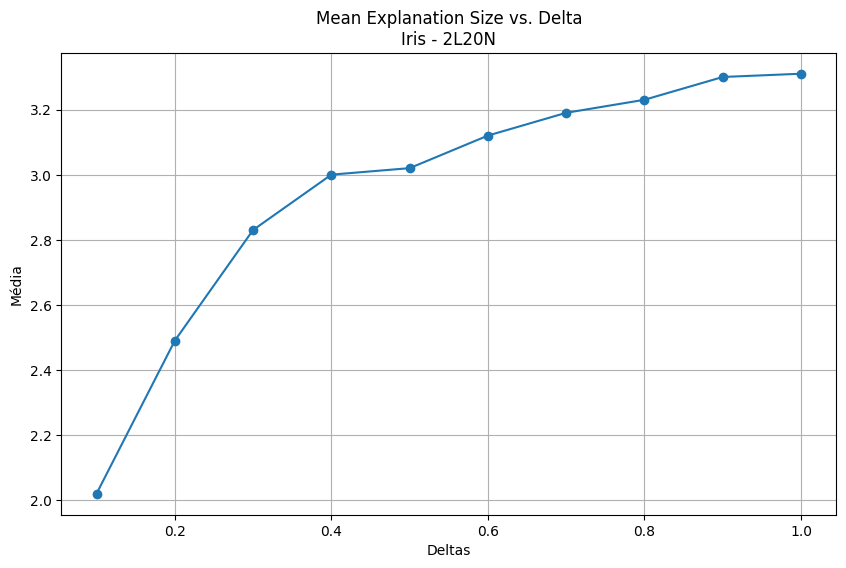

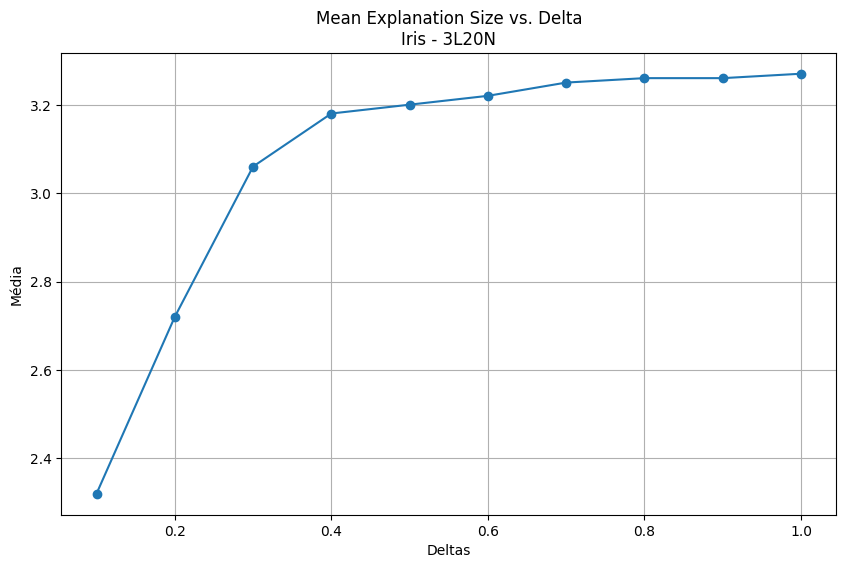

In [107]:
plot_mean_values(iris_m1, 'Mean Explanation Size vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Explanation Size vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Explanation Size vs. Delta\nIris - 3L20N')

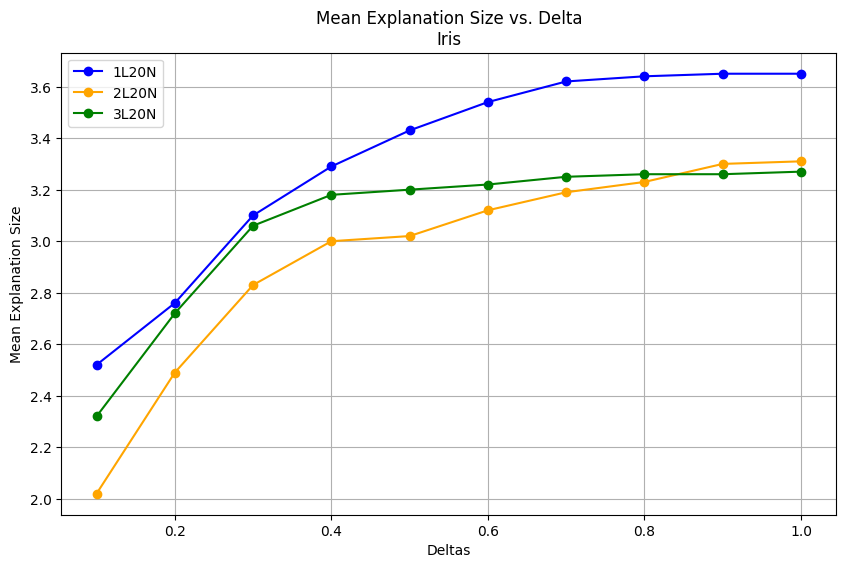

In [108]:
plot_multiple_means(
    dfs=[iris_m1, iris_m2, iris_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nIris',
    x_label='Deltas',
    y_label='Mean Explanation Size'
)


In [109]:
# plot_multiple_means(
#     dfs=[iris_m1, iris_m2, iris_m3],
#     titles=['1L20N', '2L20N', '3L20N'],
#     colors=['blue', 'orange', 'green'],
#     plt_title='Mean Explanation Size vs. Delta\nIris',
#     x_label='Deltas',
#     y_label='Mean Explanation Size',
#     show_std=True
# )


### Tempo

In [110]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(iris, "model_1layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(iris, "model_2layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, "model_3layers_20neurons.h5", deltas, column_name="relaxed_times")

format_mean_std(
    iris_m1_mean,
    iris_m2_mean,
    iris_m3_mean,
    iris_m1_std,
    iris_m2_std,
    iris_m3_std,
    deltas,
    mean_format="{:.4f}",
    std_format="{:.4f}",
)

,1L20N,2L20N,3L20N
0.1,0.0391 ± 0.0072,0.0706 ± 0.0338,0.0925 ± 0.0285
0.2,0.0454 ± 0.0314,0.0985 ± 0.0588,0.1032 ± 0.0235
0.3,0.0406 ± 0.0060,0.0900 ± 0.0324,0.1122 ± 0.0415
0.4,0.0429 ± 0.0215,0.0878 ± 0.0408,0.1093 ± 0.0253
0.5,0.0412 ± 0.0056,0.0757 ± 0.0332,0.1188 ± 0.0456
0.6,0.0442 ± 0.0205,0.0699 ± 0.0336,0.1186 ± 0.0465
0.7,0.0444 ± 0.0257,0.0743 ± 0.0388,0.1197 ± 0.0488
0.8,0.0417 ± 0.0047,0.0697 ± 0.0181,0.1164 ± 0.0371
0.9,0.0412 ± 0.0068,0.0717 ± 0.0298,0.1154 ± 0.0322
1.0,0.0411 ± 0.0059,0.0727 ± 0.0324,0.1199 ± 0.0414


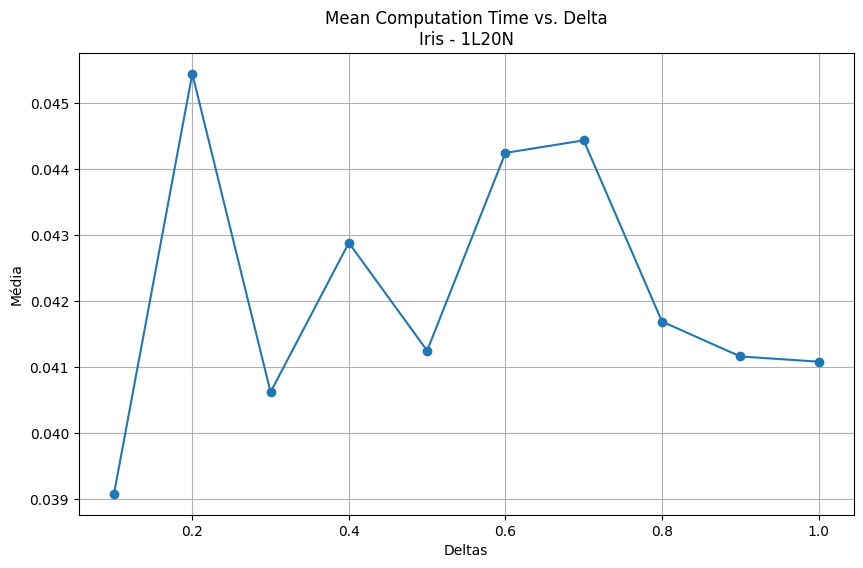

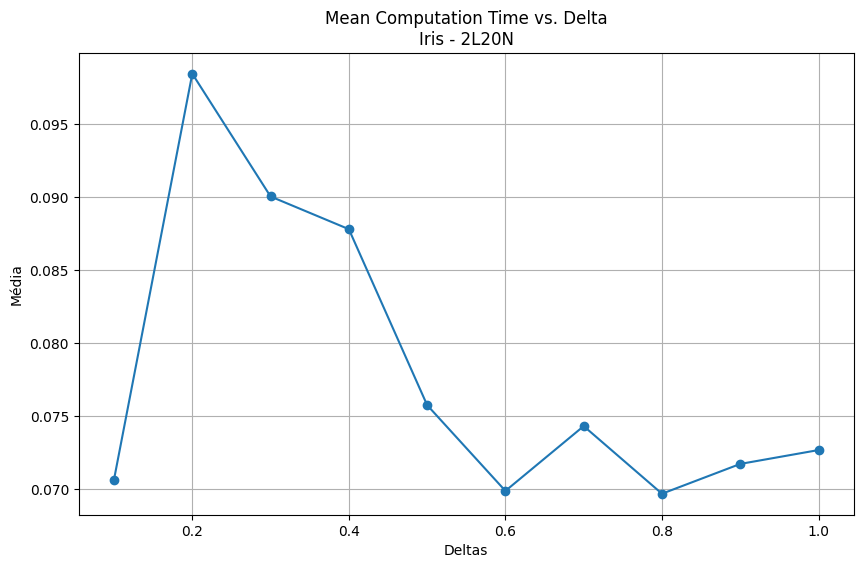

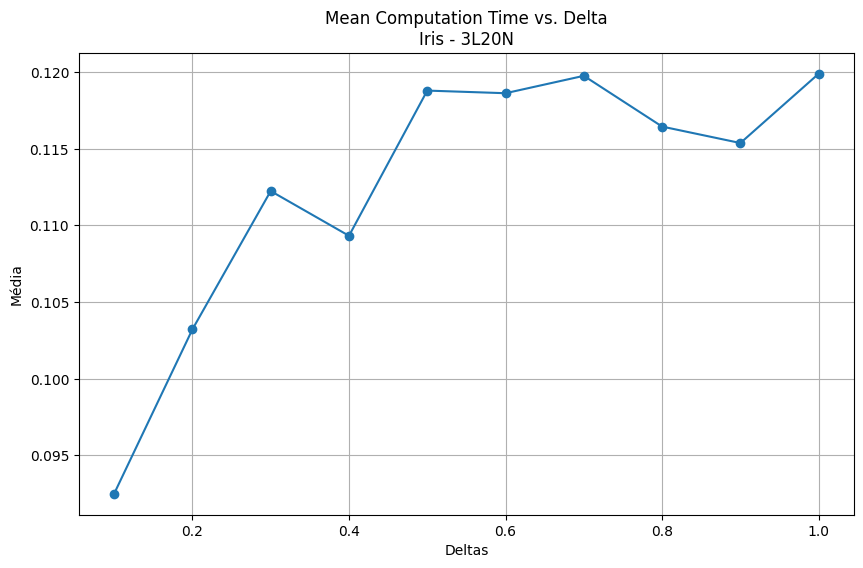

In [111]:
plot_mean_values(iris_m1, 'Mean Computation Time vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Computation Time vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Computation Time vs. Delta\nIris - 3L20N')

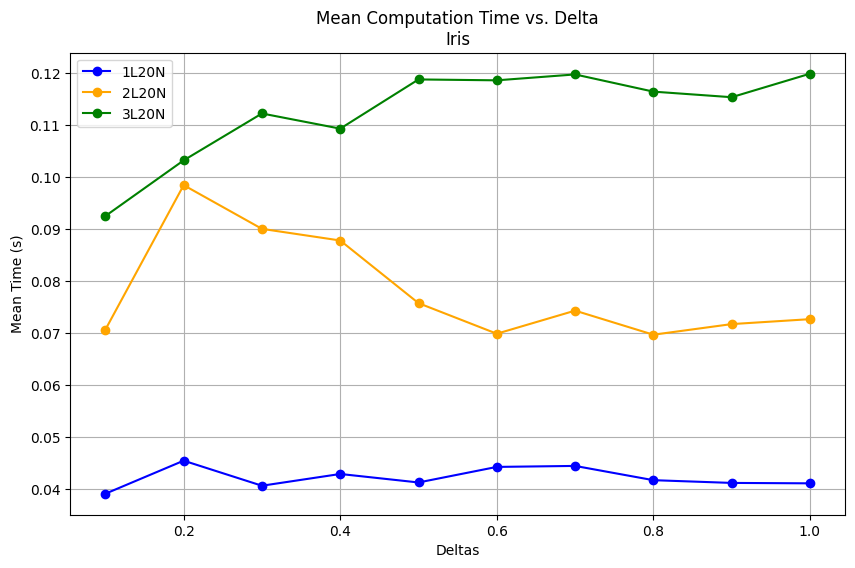

In [112]:
plot_multiple_means(
    dfs=[iris_m1, iris_m2, iris_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nIris',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Wine

### Tamanho

In [113]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,12.67 ± 1.7091,12.54 ± 1.7229,13.00 ± 0.0000
0.2,12.74 ± 1.2298,12.70 ± 1.1874,13.00 ± 0.0000
0.3,12.81 ± 0.9022,12.78 ± 0.8553,13.00 ± 0.0000
0.4,12.89 ± 0.5272,12.79 ± 0.8282,13.00 ± 0.0000
0.5,12.86 ± 0.6785,12.79 ± 0.7911,13.00 ± 0.0000
0.6,12.88 ± 0.5706,12.79 ± 0.7911,13.00 ± 0.0000
0.7,12.87 ± 0.6270,12.80 ± 0.7483,13.00 ± 0.0000
0.8,12.87 ± 0.6270,12.82 ± 0.6983,13.00 ± 0.0000
0.9,12.87 ± 0.6270,12.78 ± 0.8436,13.00 ± 0.0000
1.0,12.87 ± 0.6270,12.78 ± 0.8436,13.00 ± 0.0000


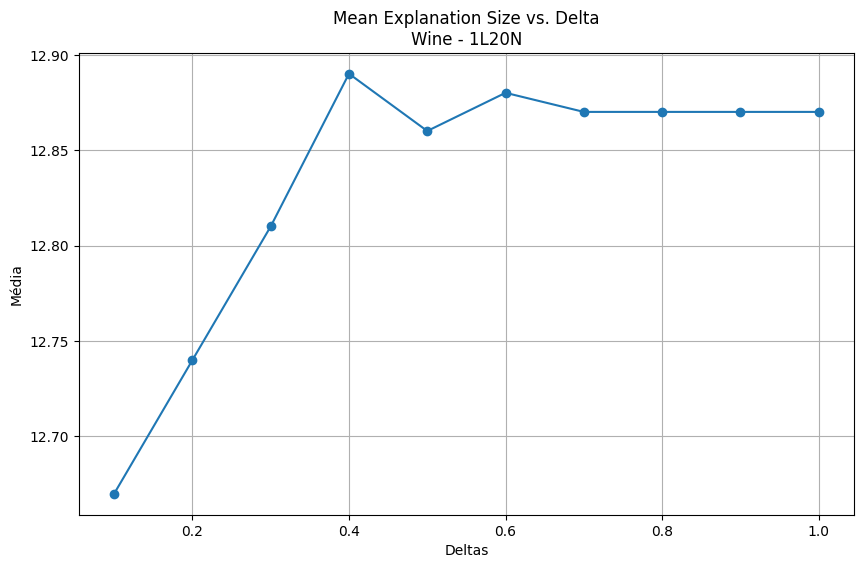

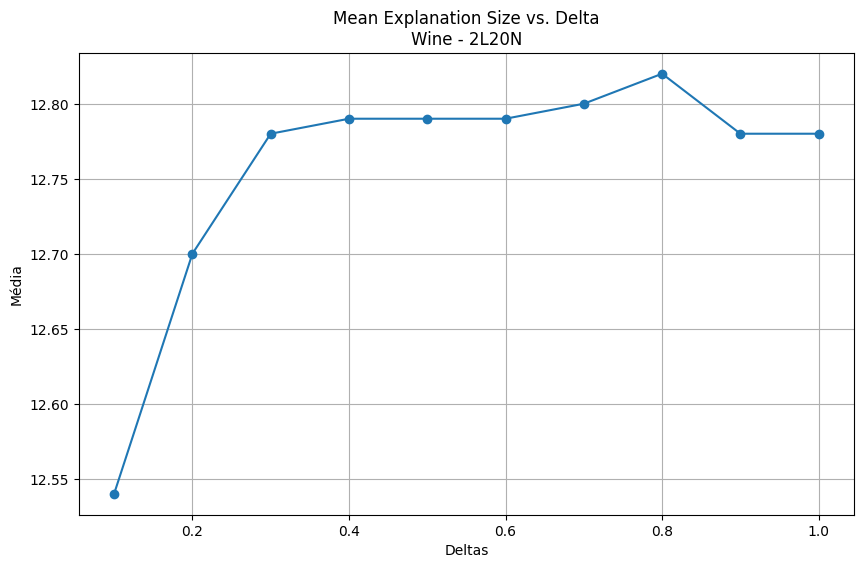

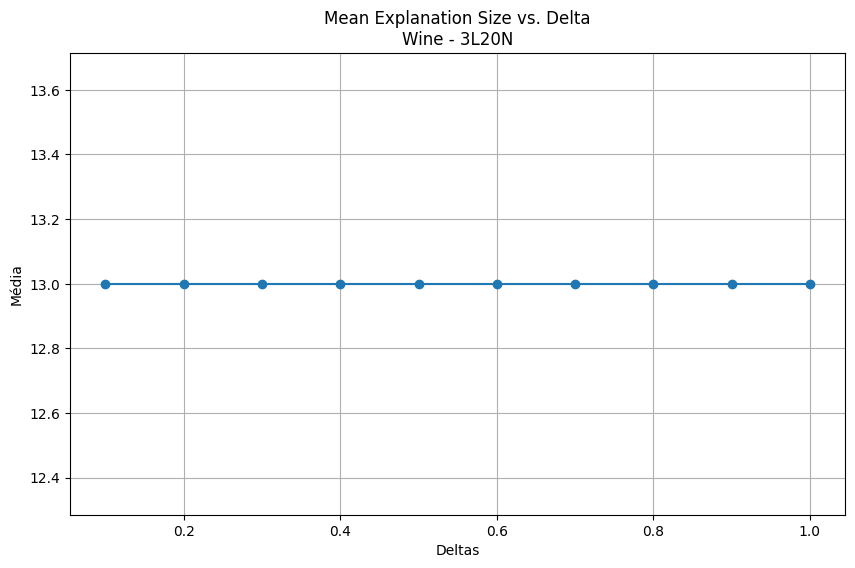

In [114]:
plot_mean_values(wine_m1, 'Mean Explanation Size vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Explanation Size vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Explanation Size vs. Delta\nWine - 3L20N')

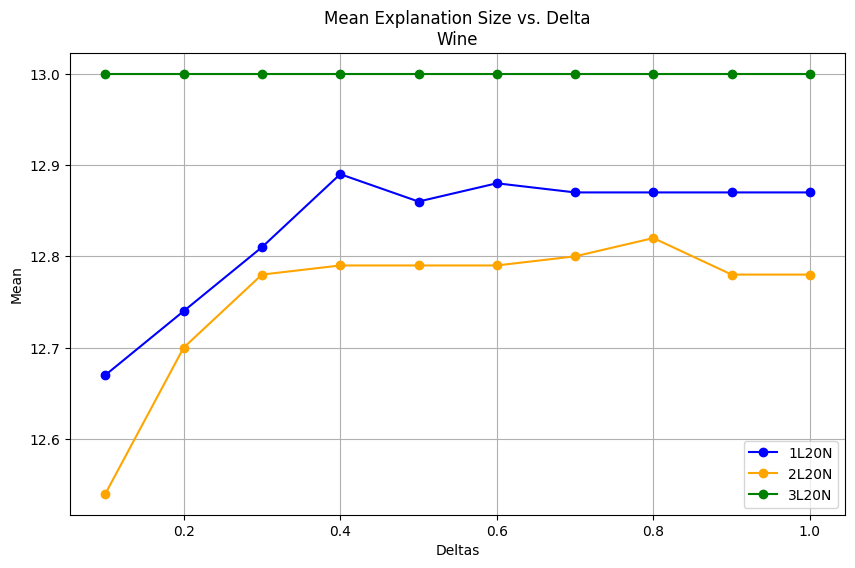

In [115]:
plot_multiple_means(
    dfs=[wine_m1, wine_m2, wine_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nWine',
    x_label='Deltas',
    y_label='Mean',
)

### Tempo

In [116]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.1200 ± 0.0265,0.1872 ± 0.0453,0.2454 ± 0.0728
0.2,0.1151 ± 0.0200,0.1847 ± 0.0354,0.2695 ± 0.0703
0.3,0.1153 ± 0.0202,0.1935 ± 0.0469,0.2979 ± 0.0899
0.4,0.1194 ± 0.0358,0.1991 ± 0.0446,0.3257 ± 0.0917
0.5,0.1184 ± 0.0399,0.1989 ± 0.0442,0.3310 ± 0.0918
0.6,0.1122 ± 0.0171,0.2146 ± 0.0740,0.3367 ± 0.0831
0.7,0.1117 ± 0.0143,0.2073 ± 0.0512,0.3464 ± 0.0957
0.8,0.1138 ± 0.0228,0.2105 ± 0.0607,0.3405 ± 0.0962
0.9,0.1134 ± 0.0153,0.2116 ± 0.0572,0.3431 ± 0.0953
1.0,0.1145 ± 0.0124,0.2095 ± 0.0597,0.3410 ± 0.0882


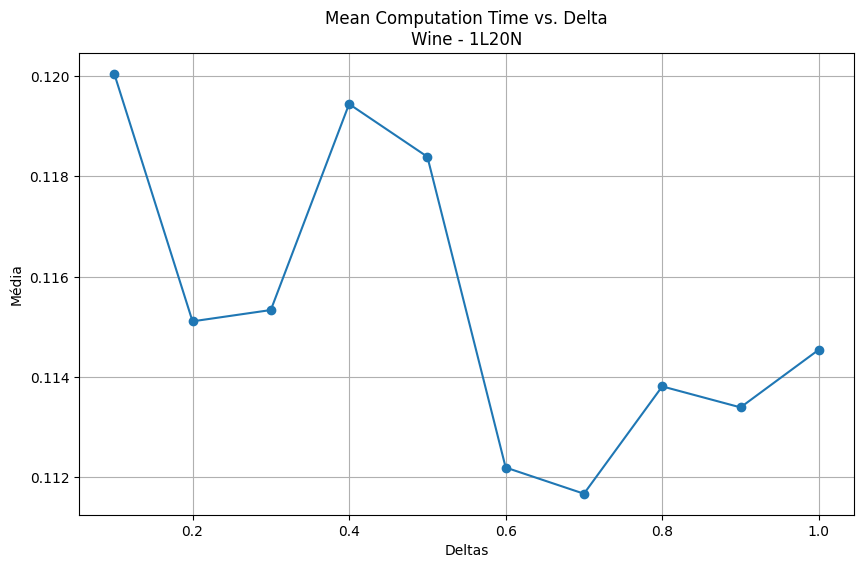

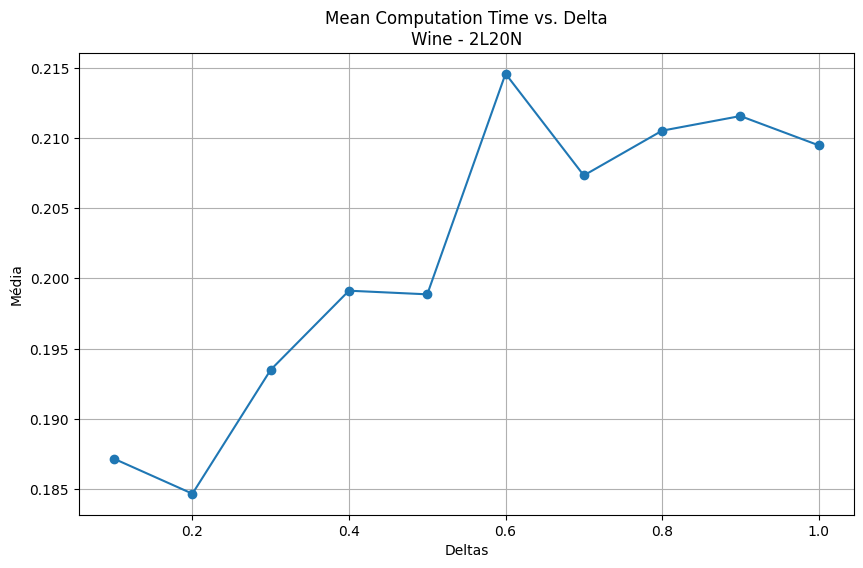

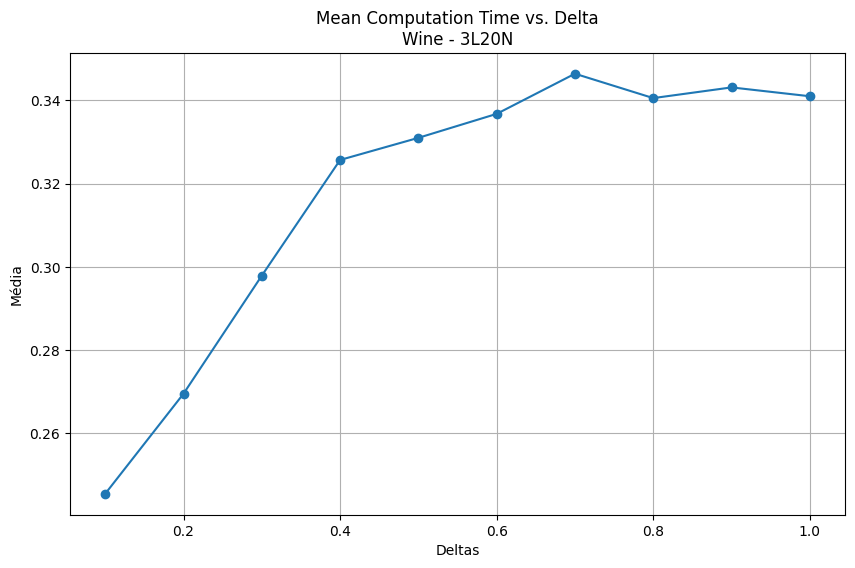

In [117]:
plot_mean_values(wine_m1, 'Mean Computation Time vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Computation Time vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Computation Time vs. Delta\nWine - 3L20N')

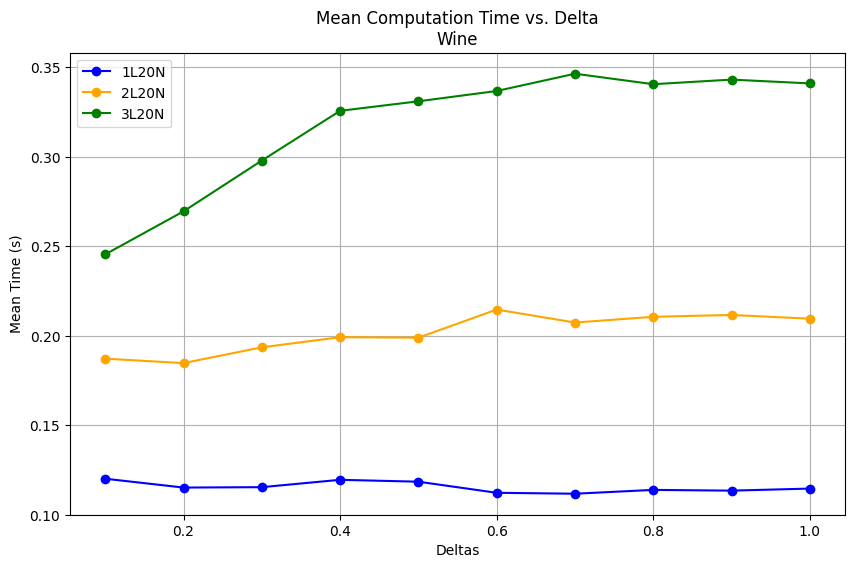

In [118]:
plot_multiple_means(
    dfs=[wine_m1, wine_m2, wine_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nWine',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Breast Cancer

### Tamanho

In [119]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,28.34 ± 3.7848,30.00 ± 0.0000,30.00 ± 0.0000
0.2,28.80 ± 2.7964,30.00 ± 0.0000,30.00 ± 0.0000
0.3,28.83 ± 2.7787,30.00 ± 0.0000,30.00 ± 0.0000
0.4,28.97 ± 2.4309,30.00 ± 0.0000,30.00 ± 0.0000
0.5,29.02 ± 2.2538,30.00 ± 0.0000,30.00 ± 0.0000
0.6,29.08 ± 2.2212,30.00 ± 0.0000,30.00 ± 0.0000
0.7,29.03 ± 2.2515,30.00 ± 0.0000,30.00 ± 0.0000
0.8,29.05 ± 2.1835,30.00 ± 0.0000,30.00 ± 0.0000
0.9,29.04 ± 2.2312,30.00 ± 0.0000,30.00 ± 0.0000
1.0,29.04 ± 2.2312,30.00 ± 0.0000,30.00 ± 0.0000


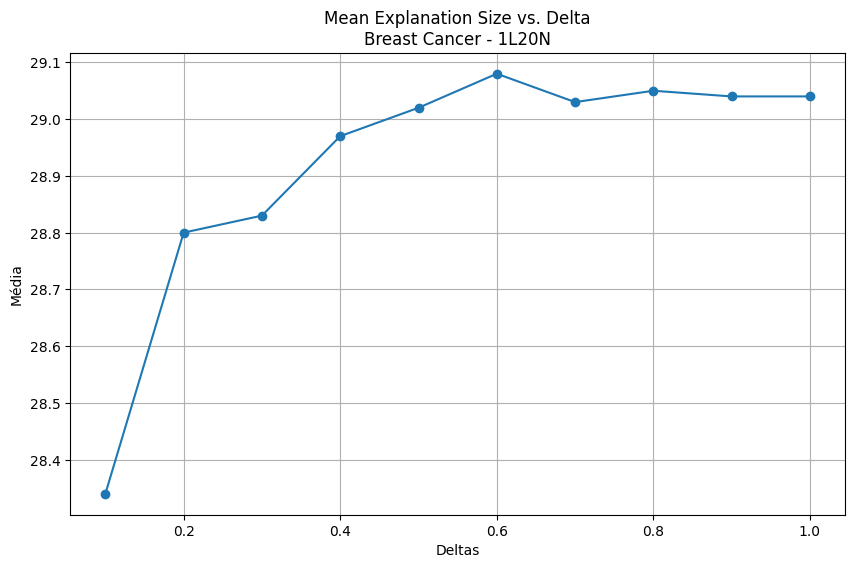

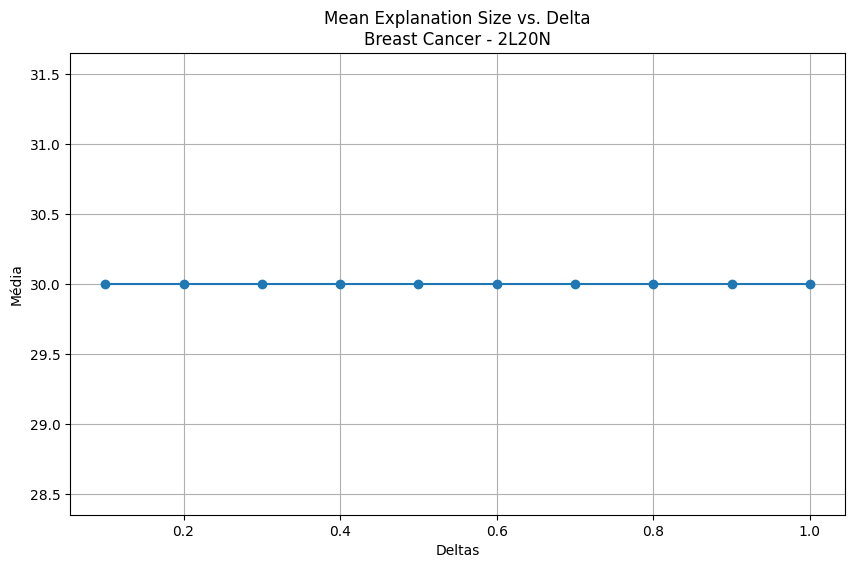

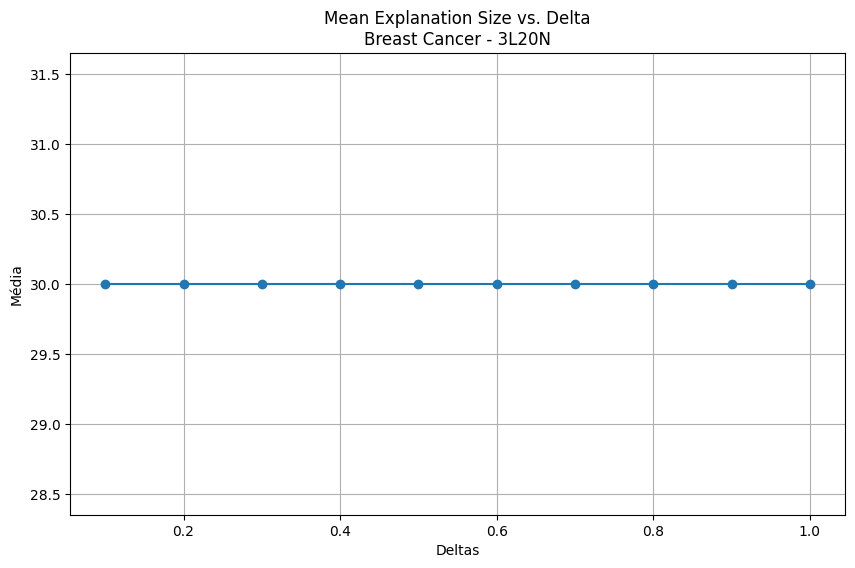

In [120]:
plot_mean_values(breast_cancer_m1, 'Mean Explanation Size vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Explanation Size vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Explanation Size vs. Delta\nBreast Cancer - 3L20N')

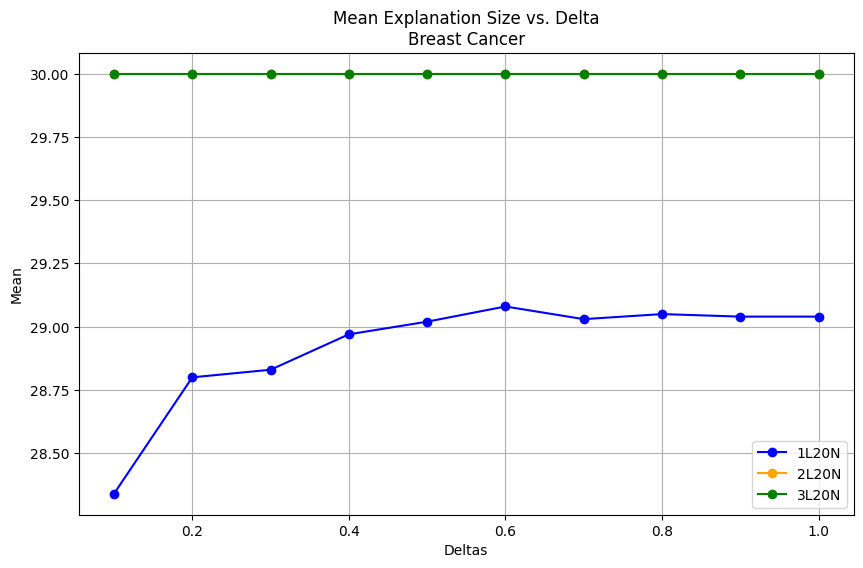

In [121]:
plot_multiple_means(
    dfs=[breast_cancer_m1, breast_cancer_m2, breast_cancer_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nBreast Cancer',
    x_label='Deltas',
    y_label='Mean',
)

### Tempo

In [122]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")


,1L20N,2L20N,3L20N
0.1,0.2546 ± 0.0498,0.4216 ± 0.0993,0.5543 ± 0.1289
0.2,0.2510 ± 0.0513,0.4159 ± 0.0777,0.6956 ± 0.2723
0.3,0.2484 ± 0.0515,0.4431 ± 0.0971,0.7344 ± 0.2459
0.4,0.2487 ± 0.0504,0.4658 ± 0.1118,0.7123 ± 0.2280
0.5,0.2557 ± 0.0585,0.4625 ± 0.0941,0.7371 ± 0.2436
0.6,0.2505 ± 0.0392,0.4679 ± 0.0940,0.7433 ± 0.2476
0.7,0.2566 ± 0.0675,0.4732 ± 0.1075,0.7568 ± 0.2740
0.8,0.2478 ± 0.0496,0.4756 ± 0.1065,0.7503 ± 0.2768
0.9,0.2502 ± 0.0605,0.4711 ± 0.1058,0.7400 ± 0.2613
1.0,0.2482 ± 0.0519,0.4751 ± 0.1031,0.7580 ± 0.2671


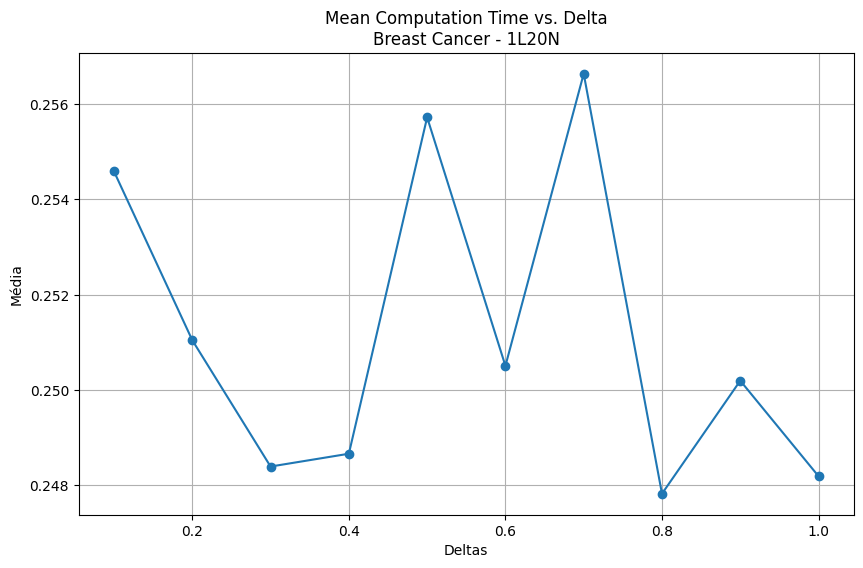

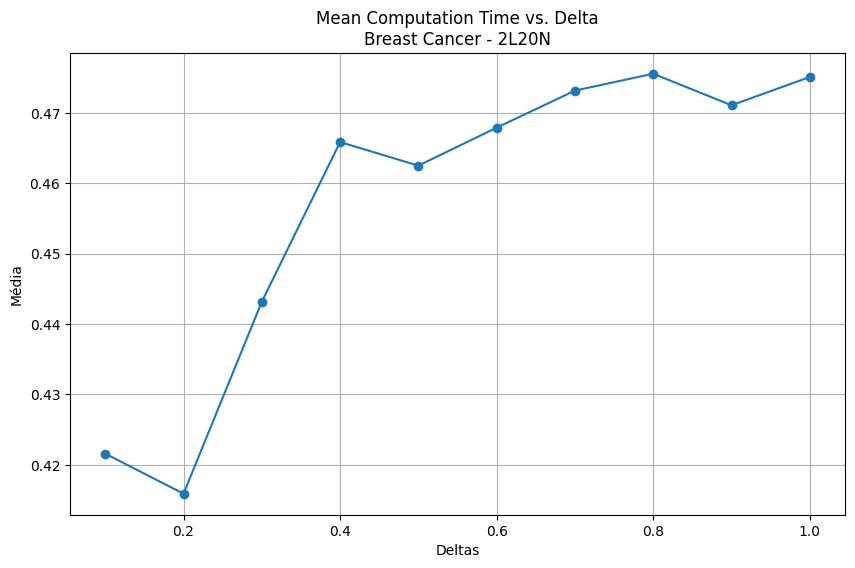

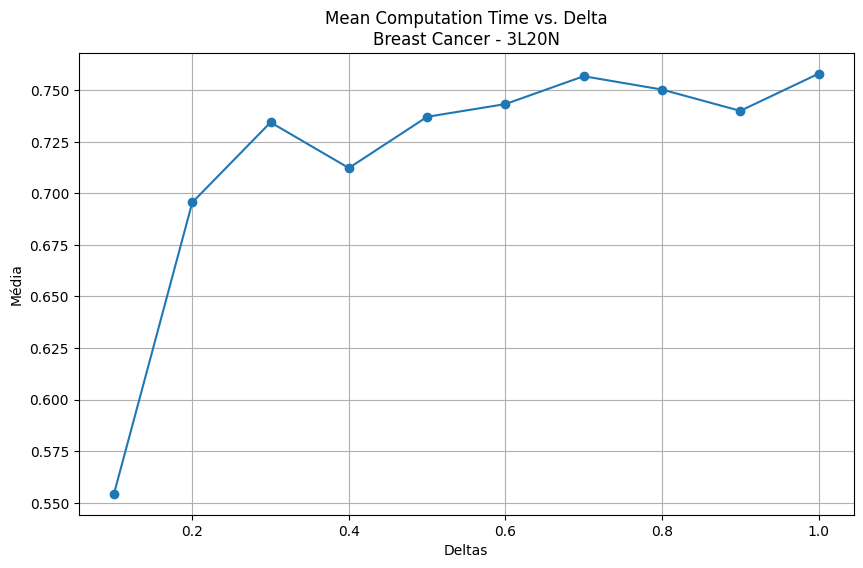

In [123]:
plot_mean_values(breast_cancer_m1, 'Mean Computation Time vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Computation Time vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Computation Time vs. Delta\nBreast Cancer - 3L20N')

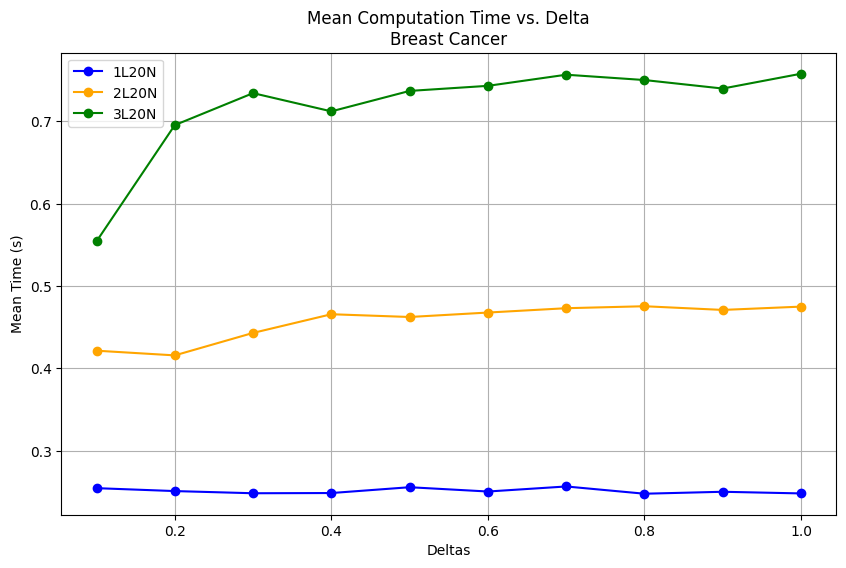

In [124]:
plot_multiple_means(
    dfs=[breast_cancer_m1, breast_cancer_m2, breast_cancer_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nBreast Cancer',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Glass

In [125]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,8.94 ± 0.5970,8.97 ± 0.2985,9.00 ± 0.0000
0.2,8.96 ± 0.3980,8.98 ± 0.1990,9.00 ± 0.0000
0.3,8.97 ± 0.2985,8.98 ± 0.1990,9.00 ± 0.0000
0.4,8.97 ± 0.2985,8.98 ± 0.1990,9.00 ± 0.0000
0.5,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000
0.6,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000
0.7,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000
0.8,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000
0.9,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000
1.0,8.98 ± 0.1990,8.98 ± 0.1990,9.00 ± 0.0000


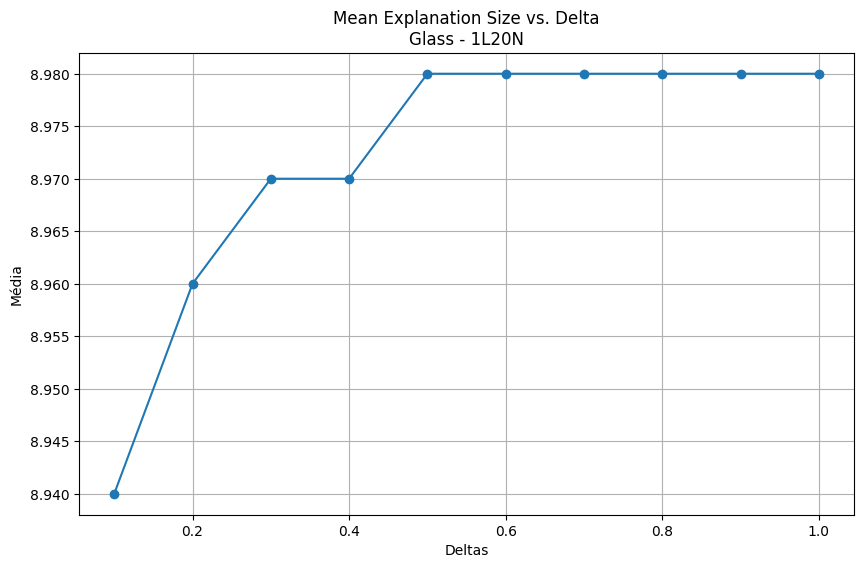

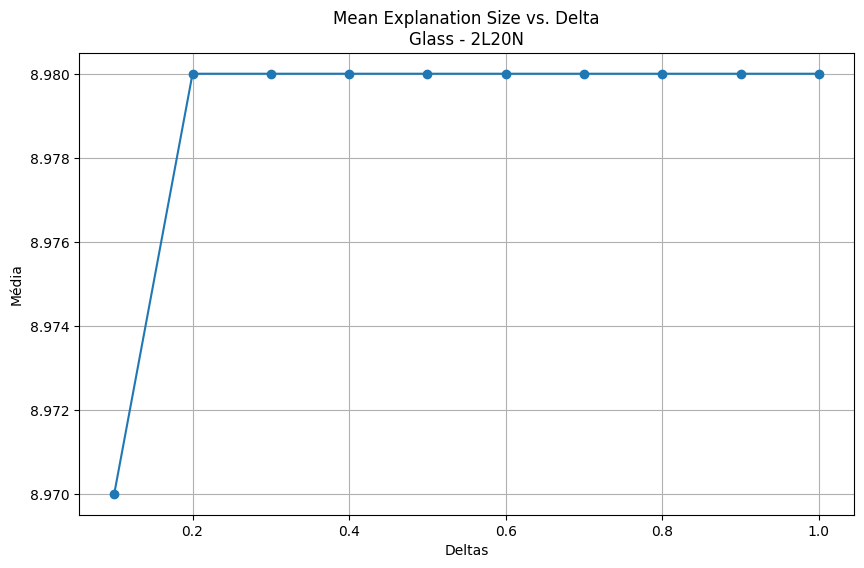

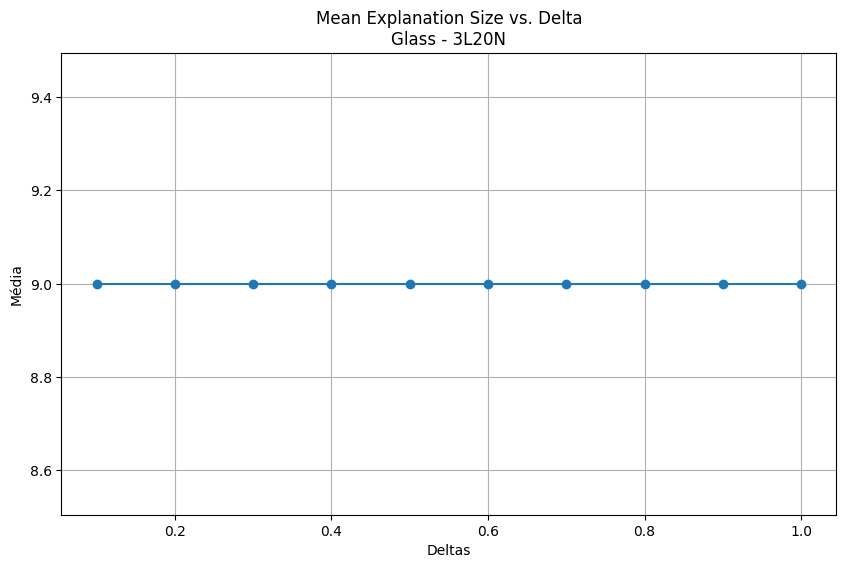

In [126]:
plot_mean_values(glass_m1, 'Mean Explanation Size vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Explanation Size vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Explanation Size vs. Delta\nGlass - 3L20N')

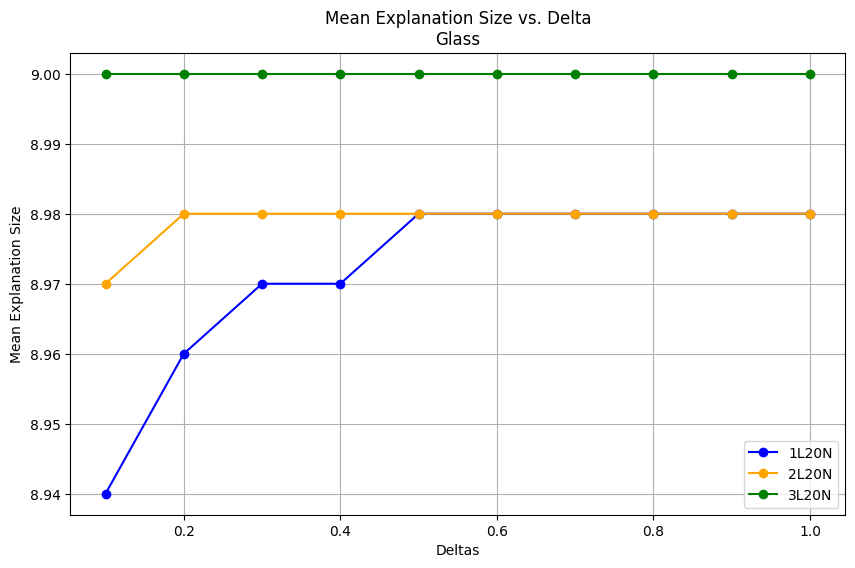

In [127]:
plot_multiple_means(
    dfs=[glass_m1, glass_m2, glass_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nGlass',
    x_label='Deltas',
    y_label='Mean Explanation Size',
)

In [128]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.0909 ± 0.0160,0.1335 ± 0.0402,0.1987 ± 0.0441
0.2,0.0852 ± 0.0127,0.1290 ± 0.0379,0.2289 ± 0.0597
0.3,0.0849 ± 0.0212,0.1319 ± 0.0403,0.2462 ± 0.0772
0.4,0.0858 ± 0.0271,0.1328 ± 0.0411,0.2619 ± 0.1098
0.5,0.0801 ± 0.0086,0.1343 ± 0.0345,0.2549 ± 0.0697
0.6,0.0801 ± 0.0076,0.1391 ± 0.0433,0.2620 ± 0.0769
0.7,0.0799 ± 0.0140,0.1418 ± 0.0503,0.2544 ± 0.0613
0.8,0.0802 ± 0.0103,0.1378 ± 0.0374,0.2526 ± 0.0615
0.9,0.0801 ± 0.0118,0.1481 ± 0.0520,0.2678 ± 0.0795
1.0,0.0774 ± 0.0075,0.1436 ± 0.0460,0.2539 ± 0.0774


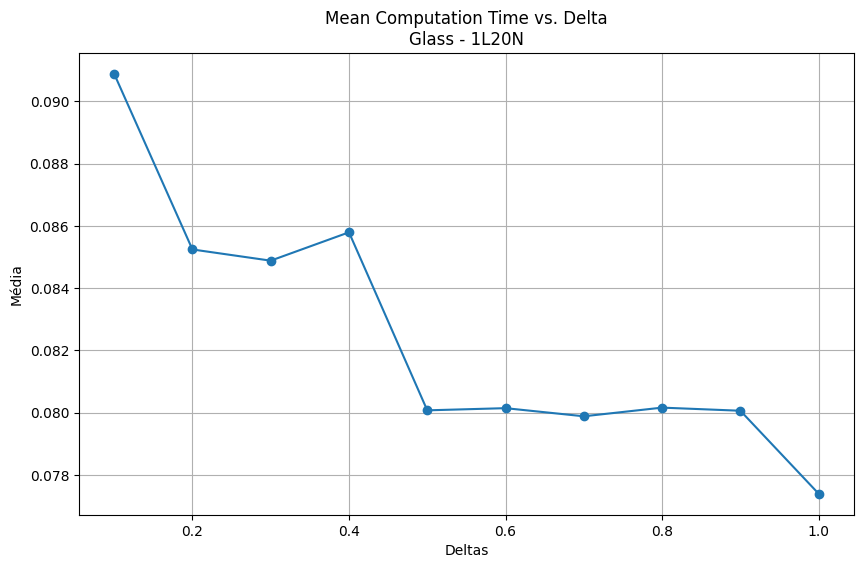

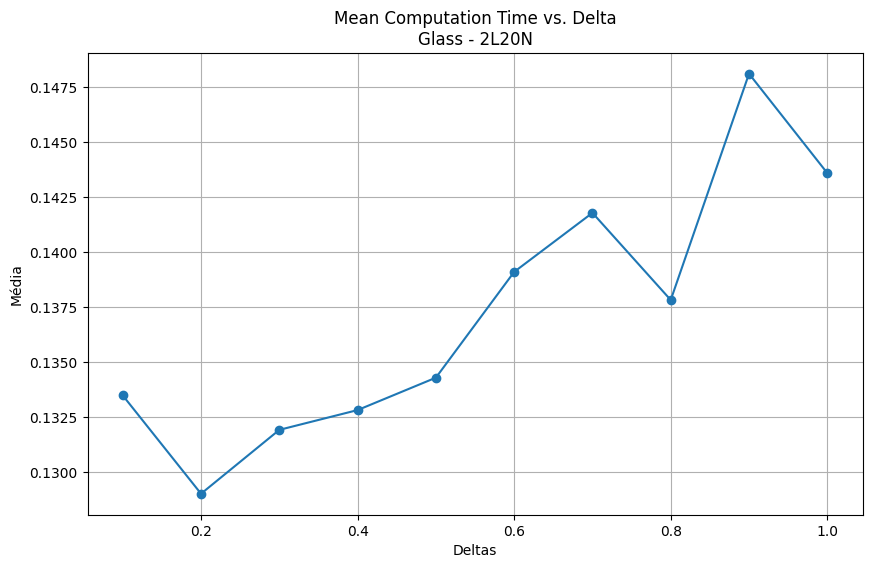

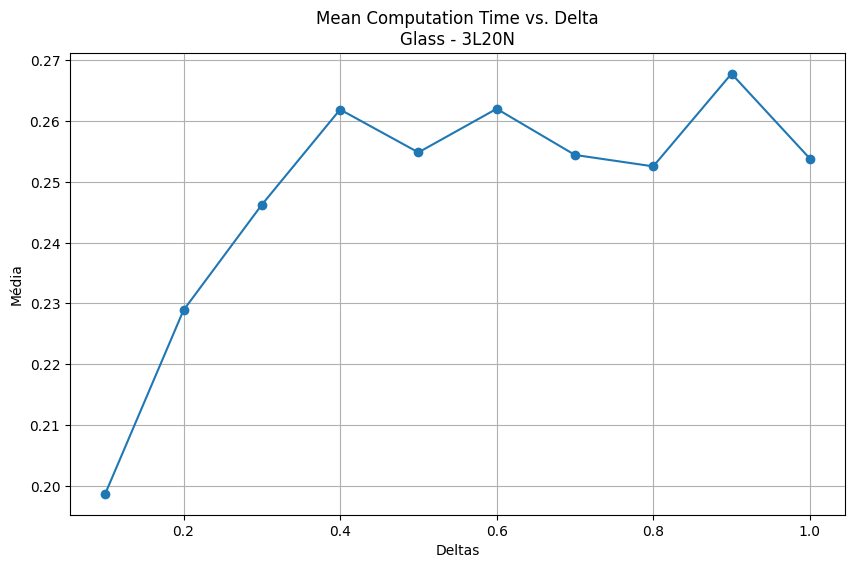

In [129]:
plot_mean_values(glass_m1, 'Mean Computation Time vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Computation Time vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Computation Time vs. Delta\nGlass - 3L20N')

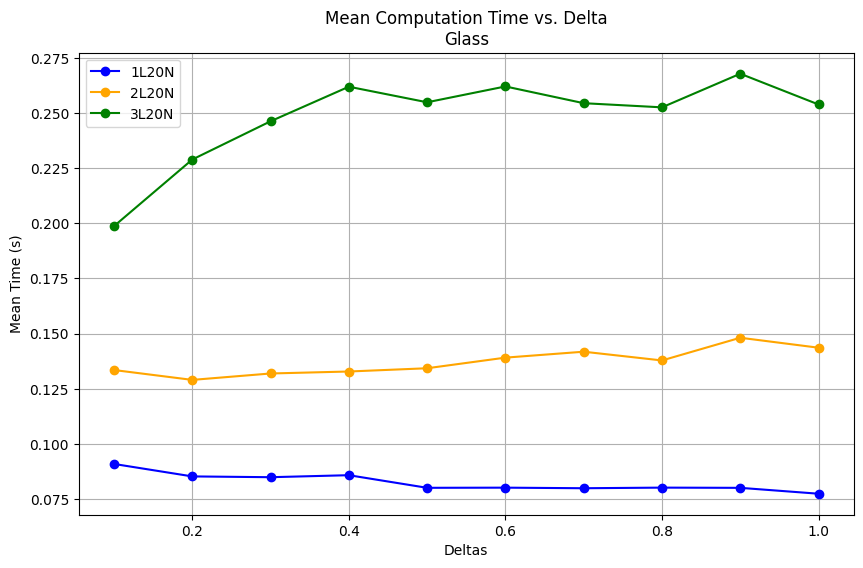

In [130]:
plot_multiple_means(
    dfs=[glass_m1, glass_m2, glass_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nGlass',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Digits

In [131]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas)

NameError: name 'digits' is not defined

In [ ]:
plot_mean_values(digits_m1, 'Mean Explanation Size vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Explanation Size vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Explanation Size vs. Delta\nDigits - 3L20N')

In [ ]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

In [ ]:
plot_mean_values(digits_m1, 'Mean Computation Time vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Computation Time vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Computation Time vs. Delta\nDigits - 3L20N')